## $k_\infty$ and Diffusion Length for a Water Balloon

$\textbf{(100 points)}$ Consider a water balloon that you fill with a homogeneous mixture of
heavy water and fissile material. You do not know the exact ratio of the
water molecules to fissile atoms. However, you can fill the balloon with
different amounts of the solution (thereby changing the radius of the
sphere). You are able to measure the multiplication factor,
$k_\mathrm{eff}$, at several different balloon radii by pulsing the
sphere with a neutron source and observing the subcritical
multiplication. You also astutely remember that the 1-group diffusion
theory relation between the multiplication factor, the infinite medium
multiplication factor $k_\infty$, and the diffusion length, $L$ is

$$k_\mathrm{eff} = \frac{k_\infty}{1+L^2 B_g^2},$$

where $B_g^2$ is the geometric buckling for the system. In this case we have

$$B_g^2 = \frac{\pi^2}{(R+d)^2},$$

where $d$ is the extrapolation length. If we assume that $d \ll R$, we can do a linear Taylor expansion around $d=0$ to write

$$B_g^2 = \frac{\pi^2}{R^2} - \frac{2 \pi^2}{R^3}d.$$

Given the measurement data below, infer the values of $k_\infty$, $L$, and $d$. Is the assumption on $d$ correct? What radius will make the reactor critical? Report $R^2$ for your model.

Hint: make your regression model have the dependent variable be $1/k_\mathrm{eff}$.

## Solution

We have an equation for the geometric buckling that can be substitued into the equation for the multiplication factor as follows

$$k_\mathrm{eff} = \frac{k_\infty}{1 + L^2\Big(\frac{\pi^2}{R^2} - \frac{2 \pi^2}{R^3}d\Big)}.$$

Taking the hint, we are going to let $\frac{1}{k_\mathrm{eff}}$ be the experimential variable. As such, the equation above can be re-ordered like so

$$\frac{1}{k_\mathrm{eff}} = \frac{1 + L^2\Big(\frac{\pi^2}{R^2} - \frac{2 \pi^2}{R^3}d\Big)}{k_\infty},$$

and is then re-organized

$$\frac{1}{k_\mathrm{eff}} = \frac{1}{k_\infty} + \frac{1}{R^2} \frac{L^2 \pi^2}{k_\infty} - \frac{2 L^2 d \pi^2}{k_\infty} \frac{1}{R^3}.$$

This is then simplified further as

$$\frac{1}{k_\mathrm{eff}} = a + \frac{1}{R^2} b + \frac{1}{R^3} c,$$

where

$$k_\infty = \frac{1}{a},$$

$$L = \sqrt{\frac{k_\infty b}{\pi^2}},$$

and

$$d = -\frac{k_\infty c}{2 L^2 \pi^2}.$$

Once these variables are all known, the critical radius, $R_\mathrm{crit}$ can be determined as follows:

$$R_\mathrm{crit} = \sqrt{\frac{L^2 \pi^2}{k_\infty - 1}} - d.$$

Knowing this, we will will first define our expiermental data in $\texttt{Python}$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import given data
R = np.array([10,12.5,15,20,25,35,36,40,45,50])
keff = np.array([0.16,0.23,0.31,0.46,0.60,0.80,0.82,0.87,0.93,0.98])
keffinv = np.power(keff,-1)

The numpy function $\tt{linalg.lstsq}$ is then used to preform a least-squared regression on the data. This procedure follows the "Nonlinear models" section in Chapter 11. 

In [4]:
# Fill necessary A matrix
A = np.ones((R.size,3))
A[:,1] = np.power(R,-2)
A[:,2] = np.power(R,-3)

# Run least-squared regression
solution,residuals = np.linalg.lstsq(A,keffinv)[:2]
a = solution[0]
b = solution[1]
c = solution[2]
R2 = 1 - residuals/(keffinv.size*keffinv.var())

# Print
print('The solution is')
print('1/k_eff =',a,'+',b,'R^-2 +',c,'R^-3')
print('\nWith a R^2 value of',R2)

The solution is
1/k_eff = 0.7925449706176176 + 562.5447946283518 R^-2 + -157.31148820044072 R^-3

With a R^2 value of [0.99992049]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


As seen, the result is a very reasonable $R^2$ value. Next, the solution is plotted as a simple verification (not required).

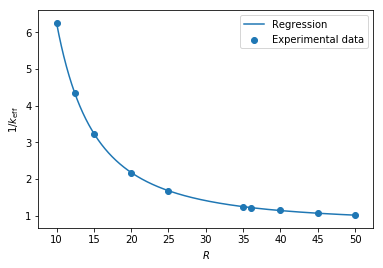

In [5]:
Rplot = np.linspace(10,50,1000)
plt.plot(Rplot,a + b/Rplot**2 + c/Rplot**3,label="Regression")
plt.scatter(R,keffinv,label='Experimental data')
plt.xlabel("$R$")
plt.ylabel("1/$k_\mathrm{eff}$")
plt.legend()
plt.show()

As expected, the agreement between the regression and the experimental data is excellent.

The desired values of $k_\infty$, $L$, $d$, and $R_\mathrm{crit}$ are then determined. Note that the values of $L$, $d$, and $R_\mathrm{crit}$ have arbitrary units of length.

In [6]:
# Determined desired values
kinf = 1/a
L = np.sqrt(kinf*b/np.pi**2)
d = -kinf*c/(2*L**2*np.pi**2)
R_crit = np.sqrt((L**2*np.pi**2)/(kinf-1)) - d

# Print
print('k_inf =',kinf)
print('L =',L)
print('d =',d)
print('R_crit =',R_crit)

k_inf = 1.2617580542094866
L = 8.480407575885692
d = 0.13982129930147996
R_crit = 51.933655013086444


From these values, it can be determined that the assumption $d \ll R$ is valid.

## Model without a constant

It does not always make sense to have a constant in a linear model. What the constant indicates is the value of the dependent variable when all the dependent variables are zero. One example of a model where this is the case is the temperature coefficient of reactivity for a nuclear system. This coefficient, denoted by $\alpha$, given by

$$\Delta \rho = \alpha \Delta T,$$

where $T$ is the temperature of the system and $\Delta T$ is the difference between the current temperature and the point where the reactivity $\rho$ is 0. The reactivity is given by

$$\rho = \frac{k-1}{k}.$$

Your task is to find $\alpha$ using the data below by fitting a model without a constant. To do this you have to modify the data matrix in the least squares procedure. Report $R^2$ for your model.

## Solution

The point at which the reactivity $\rho$ is 0 is at $k_\mathrm{eff} = 1$. We will use simple interpolation between the first two data points to find an approximate temperature at which this is true:

$$T\rvert_{\rho = 0} = T_0 + \frac{T_1 - T_0}{k_\mathrm{eff,1} - k_\mathrm{eff,0}} \Big(k_\mathrm{eff,0} - 1\Big).$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define given data
keff = np.array([1.002145,0.999901,0.998032,0.996076,
                 0.994055,0.992329])
T = np.array([250,300,350,400,450,500])

# Interpolate temperature where reactivity is 0
T_rho0 = T[1] - (T[1]-T[0])/(keff[1]-keff[0])*(keff[1]-1)
print('T_rho0 =',T_rho0)

T_rho0 = 297.79411764705975


Once the temperature at which $\rho = 0$ is determined, the individual values of $\Delta \rho$ and $\Delta T$ are then determined. A least squares procedure is then used to determine an appropriate value of $\alpha$.

In [8]:
# Determine delta values and fill A matrix
drho = (keff-1)/keff
dT = T - T_rho0
A = np.ones((drho.size,2))
A[:,1] = dT

# Solve for solution and residual
solution,residuals = np.linalg.lstsq(A,drho)[:2]
R2 = 1 - residuals/(drho.size*drho.var())
alpha = solution[1]
                     
# Print
print('alpha =',alpha,'K^-1')
print('R^2 =',R2)

alpha = -3.940900073931034e-05 K^-1
R^2 = [0.99908071]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Again, an appropriate value of $R^2$ is found.

The data is then plotted as an additional form of verification (not required).

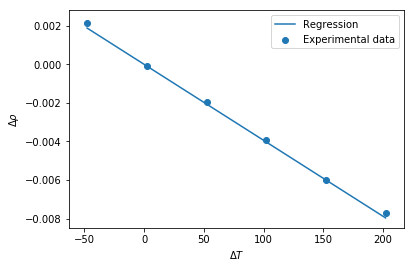

In [9]:
# Plot regression and experimental data
dTplot = np.linspace(dT.min(),dT.max(),100)
plt.plot(dTplot,alpha*dTplot,label="Regression")
plt.scatter(dT,drho,label='Experimental data')
plt.xlabel(r"$\Delta T$")
plt.ylabel(r"$\Delta \rho$")
plt.legend()
plt.show()